In [13]:
# !pip install --upgrade pip
# !pip install mysql
import pandas as pd
import seaborn as sns
import mysql.connector
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)

In [14]:
config = {
  'host':'elecsimresults2.mysql.database.azure.com',
  'user':'alexkell@elecsimresults2',
  'password':'b3rz0s4m4dr1dth3h01113s!',
  'database':'elecsimbeisresults',
  'ssl_ca':'/Users/b1017579/Documents/PhD/Projects/10. ELECSIM/run/validation-optimisation/database/BaltimoreCyberTrustRoot.crt.pem'
}

conn = mysql.connector.connect(**config)

In [15]:
ga_results = pd.read_sql('SELECT * FROM validoptimresults1', con=conn)
ga_results

,id,run_number,time_taken,timestamp_start,timestamp_end,reward,individual_m_1,individual_c_1,individual_m_2,individual_c_2,...,individual_m_17,individual_c_17,attr_nuclear_sub,attr_future_price_uncertainty_c,attr_future_price_uncertainty_m,coal,nuclear,ccgt,wind,solar
0,1,1,0.0,0.0,0.0,7.969844e+04,0.001493,25.143288,0.001580,-4.211971,...,0.002308,32.171837,139.131442,0.000402,0.000764,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
1,2,1,0.0,0.0,0.0,1.000000e+08,0.001419,10.725290,0.001454,41.107161,...,0.002540,-6.777341,81.423739,0.000353,0.000267,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
2,3,1,0.0,0.0,0.0,7.969846e+04,0.001493,25.143288,0.001580,-4.211971,...,0.002308,32.171837,139.131442,0.000402,0.000764,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
3,4,1,0.0,0.0,0.0,1.000000e+08,0.002714,0.000000,0.001591,14.490887,...,0.001507,-5.889413,100.843988,0.000611,0.000823,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
4,5,1,0.0,0.0,0.0,7.969844e+04,0.002714,-21.652826,0.001591,14.490887,...,0.001507,-5.889413,100.843988,0.000611,0.000823,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
5,6,1,0.0,0.0,0.0,1.000000e+08,0.000131,-4.809892,0.001981,12.200560,...,0.002635,-4.435448,114.966472,0.000528,0.000287,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
6,7,1,0.0,0.0,0.0,7.969845e+04,0.000880,10.867675,0.000246,5.418142,...,0.001306,32.343845,53.387810,0.000947,0.000194,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
7,8,1,0.0,0.0,0.0,7.969847e+04,0.000554,-4.643241,0.001689,-23.368597,...,0.002828,-19.753314,125.800014,0.000280,0.000904,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
8,9,1,0.0,0.0,0.0,7.969845e+04,0.000360,-29.996054,0.002584,45.771740,...,0.002169,-17.097796,85.003845,0.000106,0.000485,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
9,10,1,0.0,0.0,0.0,1.000000e+08,0.000000,48.667577,0.002150,26.627076,...,0.001333,42.773981,106.345317,0.000908,0.000957,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0


In [16]:
ga_results.sort_values(by='reward')

,id,run_number,time_taken,timestamp_start,timestamp_end,reward,individual_m_1,individual_c_1,individual_m_2,individual_c_2,...,individual_m_17,individual_c_17,attr_nuclear_sub,attr_future_price_uncertainty_c,attr_future_price_uncertainty_m,coal,nuclear,ccgt,wind,solar
126,127,1,0.0,0.0,0.0,7.969844e+04,0.000554,-4.643241,0.001689,-23.368597,...,0.002828,-19.753314,125.800014,0.000280,0.000904,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
4,5,1,0.0,0.0,0.0,7.969844e+04,0.002714,-21.652826,0.001591,14.490887,...,0.001507,-5.889413,100.843988,0.000611,0.000823,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
0,1,1,0.0,0.0,0.0,7.969844e+04,0.001493,25.143288,0.001580,-4.211971,...,0.002308,32.171837,139.131442,0.000402,0.000764,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
45,46,1,0.0,0.0,0.0,7.969844e+04,0.001486,24.962034,0.002441,47.802794,...,0.002797,39.709206,132.833688,0.000192,0.000286,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
54,55,1,0.0,0.0,0.0,7.969844e+04,0.001340,29.113684,0.002253,9.043048,...,0.001951,-25.212619,91.730905,0.000251,0.000704,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
117,118,1,0.0,0.0,0.0,7.969844e+04,0.000554,-4.643241,0.001689,-23.368597,...,0.002828,-19.753314,125.800014,0.000280,0.000904,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
26,27,1,0.0,0.0,0.0,7.969844e+04,0.001486,24.962034,0.002441,47.802794,...,0.002797,39.709206,132.833688,0.000192,0.000000,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
95,96,1,0.0,0.0,0.0,7.969844e+04,0.002008,-26.761860,0.000648,-7.417451,...,0.002886,32.880047,141.519894,0.000000,0.000166,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
12,13,1,0.0,0.0,0.0,7.969844e+04,0.000554,-4.643241,0.001689,-23.368597,...,0.002828,-19.753314,125.800014,0.000280,0.000904,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
71,72,1,0.0,0.0,0.0,7.969844e+04,0.000360,-29.996054,0.002584,45.771740,...,0.002169,-17.097796,85.003845,0.000106,0.000485,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0


In [30]:
# ga_results_small = ga_results[ga_results.reward<100000]
# sns.distplot(ga_results_small.reward, hue="run_number")

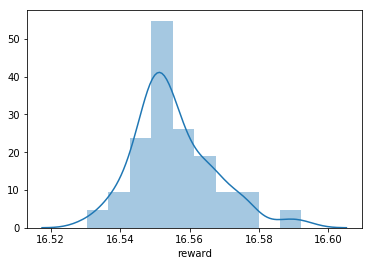

In [31]:
sns.distplot(ga_results_small[ga_results_small.run_number==2].reward)

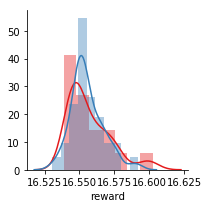

In [32]:
g = sns.FacetGrid(ga_results_small, hue="run_number", palette="Set1")
g = (g.map(sns.distplot, "reward"))